In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

Welcome to my exploration and report on the top 1000 movies from IMDB! First, we'll load in the top 1000 movies and check which top the 1000 and which are at the bottom.

In [3]:
movies_df = pd.read_csv('imdb_top_1000.csv')

In [4]:
movies_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
movies_df.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


There are some classics here from all eras of cinema. Let's take a look at the scores, generally.

In [7]:
movies_df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


It's interesting to see that the top 1000 movies of all time don't average higher than an 8 on their IMDB score. There's no pleasing some people...

In [9]:
movies_df.keys()

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

Looking at the keys, given it won't come up much during the more numerical focused parts later in the report, I think it could be interesting to see which certificate ratings are most represented among the top 1000.

In [11]:
movies_df['Certificate'].value_counts()

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

There's quite a nice spread among the more common certificates here, with movies viewable by most audiences taking up the lion's share, as we'd expect. (Its worth noting that from what I can gather, the author of the dataframe was based in India, so the certificates don't necessarily equate to UK certificates. Roughly speaking, U movies are universal, UA movies are 12+/12A, A movies are 15+, and R are 18+)

Next, let's look at the stars of show-business.

In [13]:
movies_df['Star1'].value_counts().head()

Star1
Tom Hanks          12
Robert De Niro     11
Al Pacino          10
Clint Eastwood     10
Humphrey Bogart     9
Name: count, dtype: int64

It appears that Tom Hanks, Robert De Niro, Al Pacino, and Clint Eastwood are the best indicators of quality. But how does this stack up against their ability to draw money at the box-office?

First we'll have to convert the gross revenue to a numeric value, as the dataset is storing them as strings.

In [16]:
movies_df['Gross'] = pd.to_numeric(movies_df['Gross'].str.replace(',', ''))

Let's have a look at the spread of gross revenue too, to get a sense of how they relate.

In [18]:
pd.options.display.float_format = '{:,.3f}'.format
movies_df['Gross'].describe()

count           831.000
mean     68,034,750.874
std     109,750,043.192
min           1,305.000
25%       3,253,559.000
50%      23,530,892.000
75%      80,750,893.500
max     936,662,225.000
Name: Gross, dtype: float64

We can see that the average movie in the top 1000 grosses just over 68 million dollars, although the median is only 23 million, which indicates that the highest grossing movies do a lot of the heavy lifting.

<Axes: xlabel='Rank', ylabel='Gross'>

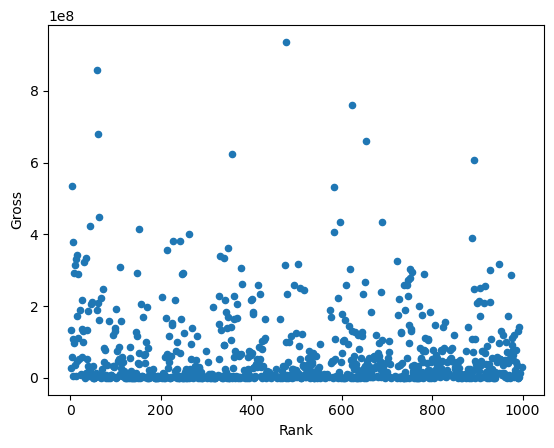

In [20]:
movies_df['Rank'] = range(1, len(movies_df) + 1)
movies_df.plot.scatter(x='Rank',y='Gross')

Let's take a better look. We can see clearly on the plot that, as suspected, most movies are hovering fairly low down, with onlu a few shooting up in the hundreds of millions of dollars.

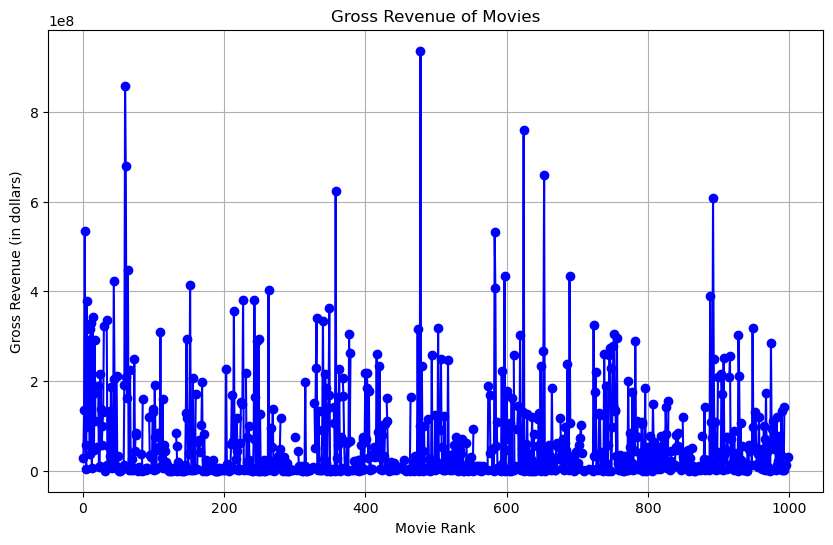

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(movies_df['Rank'], movies_df['Gross'], marker='o', color='b')
plt.title('Gross Revenue of Movies')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.show()

Now, we can see from the following that Tom Hanks' lowest drawing movie in the top 1000 still made 72 million; he is a draw after all.

In [24]:
movies_df[movies_df['Star1'] == 'Tom Hanks'].sort_values(by=['Gross'], ascending=False)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Rank
596,https://m.media-amazon.com/images/M/MV5BMTYzMD...,Toy Story 4,2019,U,100 min,"Animation, Adventure, Comedy",7.800,"When a new toy called ""Forky"" joins Woody and ...",84.000,Josh Cooley,Tom Hanks,Tim Allen,Annie Potts,Tony Hale,203177,"434,038,008.000",597
151,https://m.media-amazon.com/images/M/MV5BMTgxOT...,Toy Story 3,2010,U,103 min,"Animation, Adventure, Comedy",8.200,The toys are mistakenly delivered to a day-car...,92.000,Lee Unkrich,Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,757032,"415,004,880.000",152
11,https://m.media-amazon.com/images/M/MV5BNWIwOD...,Forrest Gump,1994,UA,142 min,"Drama, Romance",8.800,"The presidencies of Kennedy and Johnson, the e...",82.000,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,"330,252,182.000",12
647,https://m.media-amazon.com/images/M/MV5BN2Y5ZT...,Cast Away,2000,UA,143 min,"Adventure, Drama, Romance",7.800,A FedEx executive undergoes a physical and emo...,73.000,Robert Zemeckis,Tom Hanks,Helen Hunt,Paul Sanchez,Lari White,524235,"233,632,142.000",648
24,https://m.media-amazon.com/images/M/MV5BZjhkMD...,Saving Private Ryan,1998,R,169 min,"Drama, War",8.600,"Following the Normandy Landings, a group of U....",91.000,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804,"216,540,909.000",25
101,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,Toy Story,1995,U,81 min,"Animation, Adventure, Comedy",8.300,A cowboy doll is profoundly threatened and jea...,95.000,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,887429,"191,796,233.000",102
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.600,NASA must devise a strategy to return Apollo 1...,77.000,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933.000",967
25,https://m.media-amazon.com/images/M/MV5BMTUxMz...,The Green Mile,1999,A,189 min,"Crime, Drama, Fantasy",8.600,The lives of guards on Death Row are affected ...,61.000,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,1147794,"136,801,374.000",26
604,https://m.media-amazon.com/images/M/MV5BODhiZW...,Captain Phillips,2013,UA,134 min,"Adventure, Biography, Crime",7.800,The true story of Captain Richard Phillips and...,82.000,Paul Greengrass,Tom Hanks,Barkhad Abdi,Barkhad Abdirahman,Catherine Keener,421244,"107,100,855.000",605
791,https://m.media-amazon.com/images/M/MV5BNjcxMm...,Road to Perdition,2002,A,117 min,"Crime, Drama, Thriller",7.700,"A mob enforcer's son witnesses a murder, forci...",72.000,Sam Mendes,Tom Hanks,Tyler Hoechlin,Rob Maxey,Liam Aiken,246840,"104,454,762.000",792


Let's visualize it, then compare Tom's movies vs. the field.

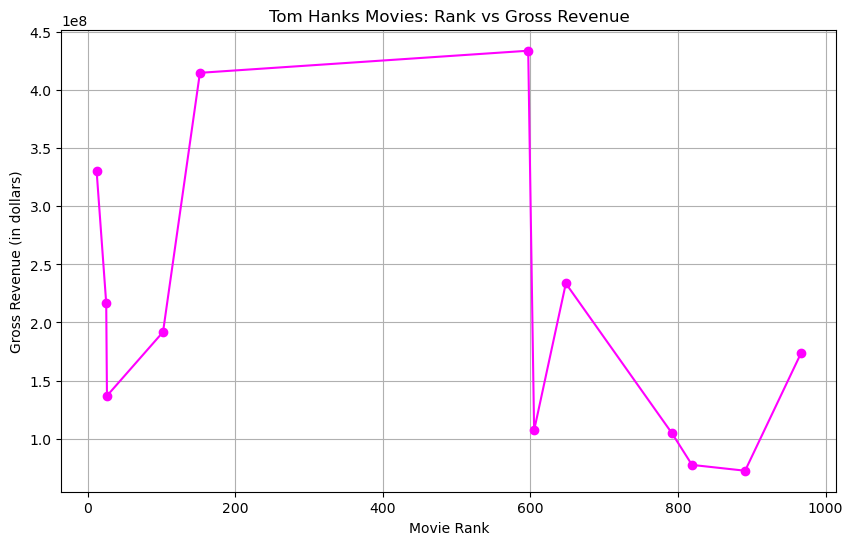

In [26]:
tom_hanks_movies = movies_df[movies_df['Star1'] == 'Tom Hanks']

plt.figure(figsize=(10, 6))
plt.plot(tom_hanks_movies['Rank'], tom_hanks_movies['Gross'], marker='o', color='magenta')
plt.title('Tom Hanks Movies: Rank vs Gross Revenue')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.show()

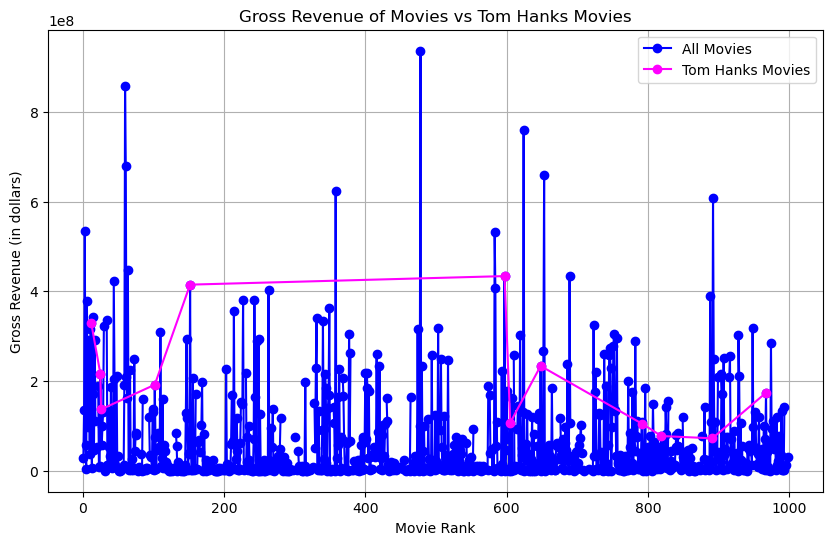

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(movies_df['Rank'], movies_df['Gross'], marker='o', label='All Movies', color='b')
plt.plot(tom_hanks_movies['Rank'], tom_hanks_movies['Gross'], marker='o', color='magenta', label='Tom Hanks Movies')
plt.title('Gross Revenue of Movies vs Tom Hanks Movies')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.legend()
plt.show()

We can clearly see that his movies draw money, but he hasn't been in any of the highest grossing films. Next, let's look at our other leading men and see how they compare.

In [29]:
movies_df[movies_df['Star1'] == 'Robert De Niro']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Rank
15,https://m.media-amazon.com/images/M/MV5BY2NkZj...,Goodfellas,1990,A,146 min,"Biography, Crime, Drama",8.700,The story of Henry Hill and his life in the mo...,90.000,Martin Scorsese,Robert De Niro,Ray Liotta,Joe Pesci,Lorraine Bracco,1020727,"46,836,394.000",16
71,https://m.media-amazon.com/images/M/MV5BMGFkNW...,Once Upon a Time in America,1984,A,229 min,"Crime, Drama",8.400,A former Prohibition-era Jewish gangster retur...,NaN,Sergio Leone,Robert De Niro,James Woods,Elizabeth McGovern,Treat Williams,311365,"5,321,508.000",72
111,https://m.media-amazon.com/images/M/MV5BM2M1Mm...,Taxi Driver,1976,A,114 min,"Crime, Drama",8.300,A mentally unstable veteran works as a nightti...,94.000,Martin Scorsese,Robert De Niro,Jodie Foster,Cybill Shepherd,Albert Brooks,724636,"28,262,574.000",112
165,https://m.media-amazon.com/images/M/MV5BMTcxOW...,Casino,1995,A,178 min,"Crime, Drama",8.200,"A tale of greed, deception, money, power, and ...",73.000,Martin Scorsese,Robert De Niro,Sharon Stone,Joe Pesci,James Woods,466276,"42,438,300.000",166
173,https://m.media-amazon.com/images/M/MV5BYjRmOD...,Raging Bull,1980,A,129 min,"Biography, Drama, Sport",8.200,"The life of boxer Jake LaMotta, whose violence...",89.000,Martin Scorsese,Robert De Niro,Cathy Moriarty,Joe Pesci,Frank Vincent,321860,"23,383,987.000",174
278,https://m.media-amazon.com/images/M/MV5BNDhmNT...,The Deer Hunter,1978,A,183 min,"Drama, War",8.100,An in-depth examination of the ways in which t...,86.000,Michael Cimino,Robert De Niro,Christopher Walken,John Cazale,John Savage,311361,"48,979,328.000",279
484,https://m.media-amazon.com/images/M/MV5BMGUyM2...,The Irishman,2019,R,209 min,"Biography, Crime, Drama",7.900,An old man recalls his time painting houses fo...,94.000,Martin Scorsese,Robert De Niro,Al Pacino,Joe Pesci,Harvey Keitel,324720,"7,000,000.000",485
664,https://m.media-amazon.com/images/M/MV5BMTczOT...,A Bronx Tale,1993,R,121 min,"Crime, Drama, Romance",7.800,A father becomes worried when a local gangster...,80.000,Robert De Niro,Robert De Niro,Chazz Palminteri,Lillo Brancato,Francis Capra,128171,"17,266,971.000",665
671,https://m.media-amazon.com/images/M/MV5BMjI5Nj...,Awakenings,1990,U,121 min,"Biography, Drama",7.800,The victims of an encephalitis epidemic many y...,74.000,Penny Marshall,Robert De Niro,Robin Williams,Julie Kavner,Ruth Nelson,125276,"52,096,475.000",672
687,https://m.media-amazon.com/images/M/MV5BMTViNj...,The King of Comedy,1982,U,109 min,"Comedy, Crime, Drama",7.800,Rupert Pupkin is a passionate yet unsuccessful...,73.000,Martin Scorsese,Robert De Niro,Jerry Lewis,Diahnne Abbott,Sandra Bernhard,88511,"2,500,000.000",688


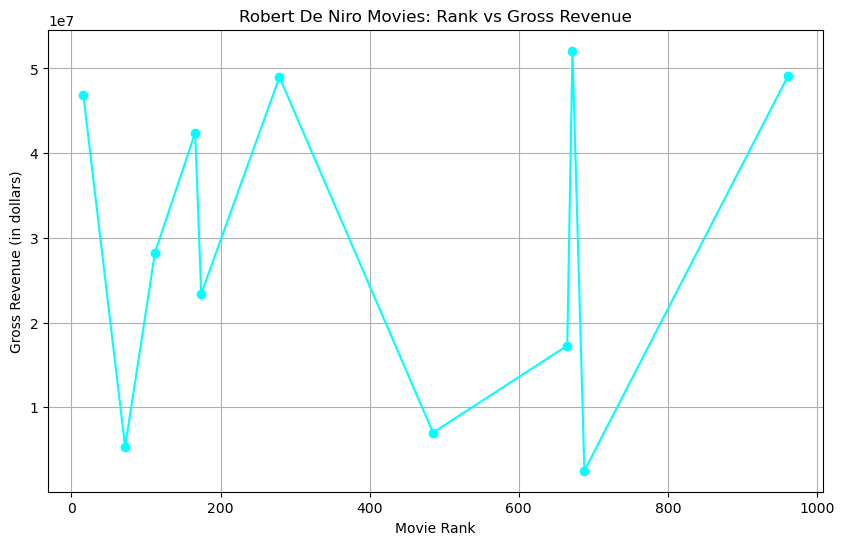

In [30]:
bobby_de_niro_movies = movies_df[movies_df['Star1'] == 'Robert De Niro']

plt.figure(figsize=(10, 6))
plt.plot(bobby_de_niro_movies['Rank'], bobby_de_niro_movies['Gross'], marker='o', color='cyan')
plt.title('Robert De Niro Movies: Rank vs Gross Revenue')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.show()

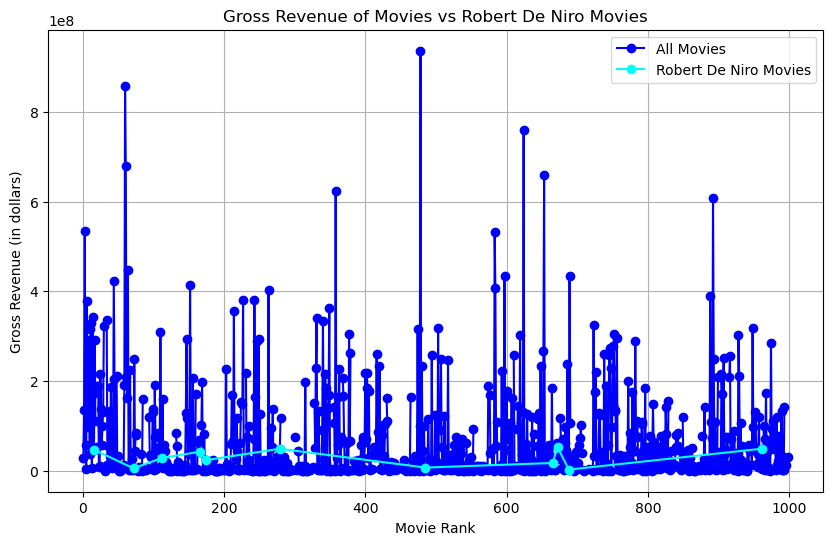

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(movies_df['Rank'], movies_df['Gross'], marker='o', label='All Movies', color='b')
plt.plot(bobby_de_niro_movies['Rank'], bobby_de_niro_movies['Gross'], marker='o', color='cyan', label='Robert De Niro Movies')
plt.title('Gross Revenue of Movies vs Robert De Niro Movies')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.legend()
plt.show()

Wow! Although Robert De Niro is in many classics, his best work hasn't drawn a great deal of money...

In [33]:
movies_df[movies_df['Star1'] == 'Al Pacino']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Rank
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.000,The early life and career of Vito Corleone in ...,90.000,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000.000",4
108,https://m.media-amazon.com/images/M/MV5BNjdjNG...,Scarface,1983,A,170 min,"Crime, Drama",8.300,"In 1980 Miami, a determined Cuban immigrant ta...",65.000,Brian De Palma,Al Pacino,Michelle Pfeiffer,Steven Bauer,Mary Elizabeth Mastrantonio,740911,"45,598,982.000",109
164,https://m.media-amazon.com/images/M/MV5BNGMwNz...,Heat,1995,A,170 min,"Crime, Drama, Thriller",8.200,A group of professional bank robbers start to ...,76.000,Michael Mann,Al Pacino,Robert De Niro,Val Kilmer,Jon Voight,577113,"67,436,818.000",165
398,https://m.media-amazon.com/images/M/MV5BZTM3Zj...,Scent of a Woman,1992,UA,156 min,Drama,8.000,A prep school student needing money agrees to ...,59.000,Martin Brest,Al Pacino,Chris O'Donnell,James Rebhorn,Gabrielle Anwar,263918,"63,895,607.000",399
416,https://m.media-amazon.com/images/M/MV5BODExZm...,Dog Day Afternoon,1975,U,125 min,"Biography, Crime, Drama",8.000,Three amateur bank robbers plan to hold up a b...,86.000,Sidney Lumet,Al Pacino,John Cazale,Penelope Allen,Sully Boyar,235652,"50,000,000.000",417
523,https://m.media-amazon.com/images/M/MV5BN2I2N2...,Carlito's Way,1993,A,144 min,"Crime, Drama, Thriller",7.900,"A Puerto Rican former convict, just released f...",65.000,Brian De Palma,Al Pacino,Sean Penn,Penelope Ann Miller,John Leguizamo,201000,"36,948,322.000",524
809,https://m.media-amazon.com/images/M/MV5BYzMzMD...,Donnie Brasco,1997,A,127 min,"Biography, Crime, Drama",7.700,An FBI undercover agent infiltrates the mob an...,76.000,Mike Newell,Al Pacino,Johnny Depp,Michael Madsen,Bruno Kirby,279318,"41,909,762.000",810
823,https://m.media-amazon.com/images/M/MV5BNTYzN2...,Glengarry Glen Ross,1992,R,100 min,"Crime, Drama, Mystery",7.700,An examination of the machinations behind the ...,82.000,James Foley,Al Pacino,Jack Lemmon,Alec Baldwin,Alan Arkin,95826,"10,725,228.000",824
849,https://m.media-amazon.com/images/M/MV5BYTU4ZT...,Serpico,1973,A,130 min,"Biography, Crime, Drama",7.700,An honest New York cop named Frank Serpico blo...,87.000,Sidney Lumet,Al Pacino,John Randolph,Jack Kehoe,Biff McGuire,109941,"29,800,000.000",850
974,https://m.media-amazon.com/images/M/MV5BNWFlYW...,The Godfather: Part III,1990,A,162 min,"Crime, Drama",7.600,"Follows Michael Corleone, now in his 60s, as h...",60.000,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,359809,"66,666,062.000",975


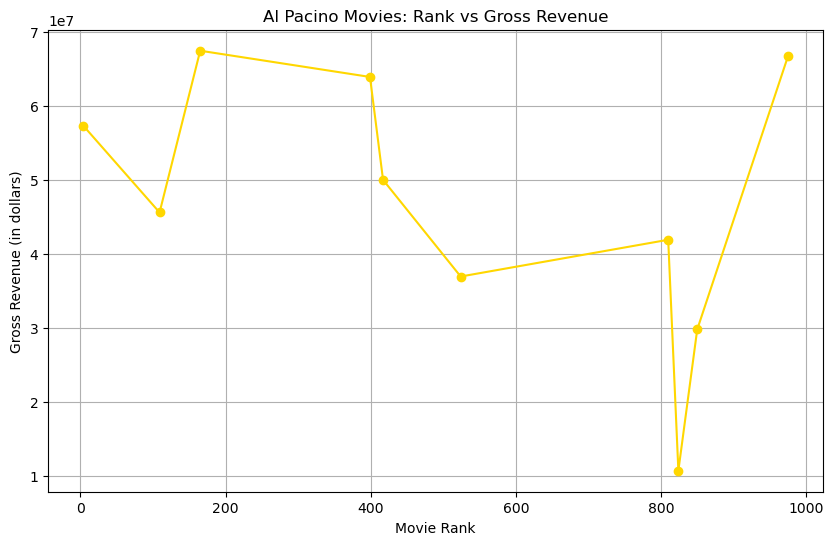

In [34]:
al_pacino_movies = movies_df[movies_df['Star1'] == 'Al Pacino']

plt.figure(figsize=(10, 6))
plt.plot(al_pacino_movies['Rank'], al_pacino_movies['Gross'], marker='o', color='gold')
plt.title('Al Pacino Movies: Rank vs Gross Revenue')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.show()

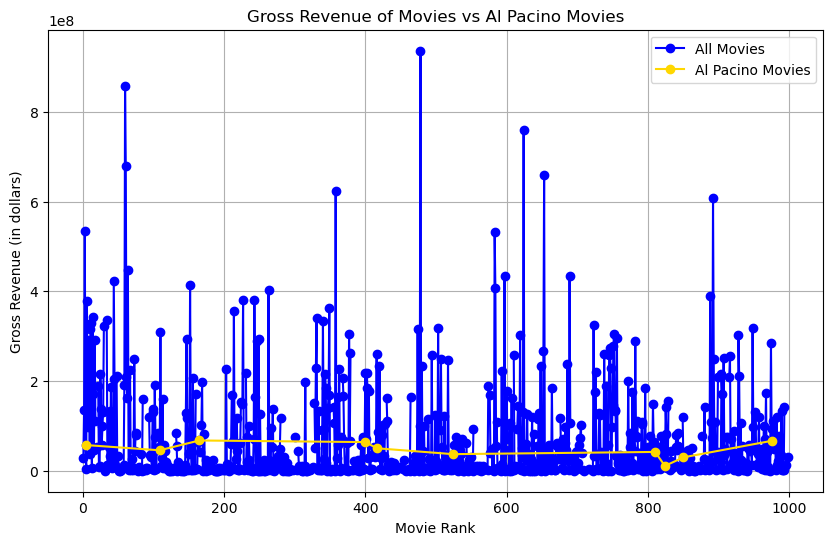

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(movies_df['Rank'], movies_df['Gross'], marker='o', label='All Movies', color='b')
plt.plot(al_pacino_movies['Rank'], al_pacino_movies['Gross'], marker='o', color='gold', label='Al Pacino Movies')
plt.title('Gross Revenue of Movies vs Al Pacino Movies')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.legend()
plt.show()

A similar story for Al Pacino. Let's have a final look at Clint Eastwood, to see if his movies fare any better.

In [37]:
movies_df[movies_df['Star1'] == 'Clint Eastwood']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Rank
12,https://m.media-amazon.com/images/M/MV5BOTQ5ND...,"Il buono, il brutto, il cattivo",1966,A,161 min,Western,8.800,A bounty hunting scam joins two men in an unea...,90.000,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffrè,688390,"6,100,000.000",13
115,https://m.media-amazon.com/images/M/MV5BNWM1Nm...,Per qualche dollaro in più,1965,U,132 min,Western,8.300,Two bounty hunters with the same intentions te...,74.000,Sergio Leone,Clint Eastwood,Lee Van Cleef,Gian Maria Volontè,Mara Krupp,232772,"15,000,000.000",116
167,https://m.media-amazon.com/images/M/MV5BODM3YW...,Unforgiven,1992,A,130 min,"Drama, Western",8.200,Retired Old West gunslinger William Munny relu...,85.000,Clint Eastwood,Clint Eastwood,Gene Hackman,Morgan Freeman,Richard Harris,375935,"101,157,447.000",168
225,https://m.media-amazon.com/images/M/MV5BMTc5NT...,Gran Torino,2008,R,116 min,Drama,8.100,Disgruntled Korean War veteran Walt Kowalski s...,72.000,Clint Eastwood,Clint Eastwood,Bee Vang,Christopher Carley,Ahney Her,720450,"148,095,302.000",226
431,https://m.media-amazon.com/images/M/MV5BYjA1MG...,Per un pugno di dollari,1964,A,99 min,"Action, Drama, Western",8.000,A wandering gunfighter plays two rival familie...,65.000,Sergio Leone,Clint Eastwood,Gian Maria Volontè,Marianne Koch,Wolfgang Lukschy,198219,"14,500,000.000",432
691,https://m.media-amazon.com/images/M/MV5BMjIxND...,The Outlaw Josey Wales,1976,A,135 min,Western,7.800,Missouri farmer Josey Wales joins a Confederat...,69.000,Clint Eastwood,Clint Eastwood,Sondra Locke,Chief Dan George,Bill McKinney,65659,"31,800,000.000",692
853,https://m.media-amazon.com/images/M/MV5BMzdhMT...,Dirty Harry,1971,A,102 min,"Action, Crime, Thriller",7.700,"When a madman calling himself ""the Scorpio Kil...",90.000,Don Siegel,Clint Eastwood,Andrew Robinson,Harry Guardino,Reni Santoni,143292,"35,900,000.000",854
965,https://m.media-amazon.com/images/M/MV5BNmRiZD...,The Bridges of Madison County,1995,A,135 min,"Drama, Romance",7.600,Photographer Robert Kincaid wanders into the l...,69.000,Clint Eastwood,Clint Eastwood,Meryl Streep,Annie Corley,Victor Slezak,73172,"71,516,617.000",966
985,https://m.media-amazon.com/images/M/MV5BNDQ3Mz...,Escape from Alcatraz,1979,A,112 min,"Action, Biography, Crime",7.600,Alcatraz is the most secure prison of its time...,76.000,Don Siegel,Clint Eastwood,Patrick McGoohan,Roberts Blossom,Jack Thibeau,121731,"43,000,000.000",986
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.600,A group of U.S. soldiers sneaks across enemy l...,50.000,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435.000",992


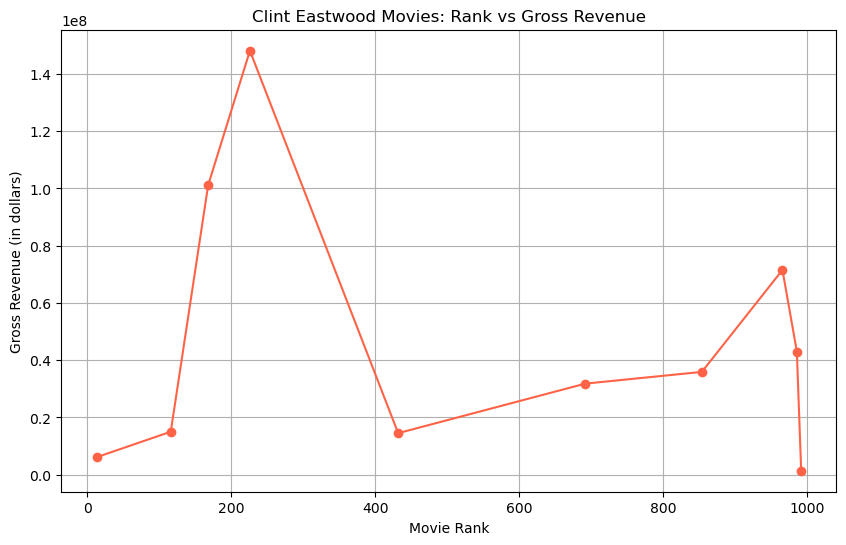

In [38]:
clint_eastwood_movies = movies_df[movies_df['Star1'] == 'Clint Eastwood']

plt.figure(figsize=(10, 6))
plt.plot(clint_eastwood_movies['Rank'], clint_eastwood_movies['Gross'], marker='o', color='tomato')
plt.title('Clint Eastwood Movies: Rank vs Gross Revenue')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.show()

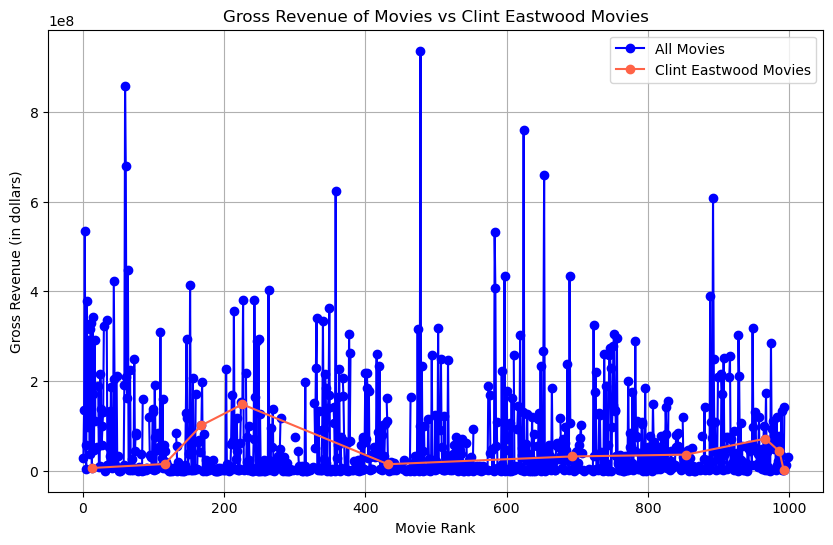

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(movies_df['Rank'], movies_df['Gross'], marker='o', label='All Movies', color='b')
plt.plot(clint_eastwood_movies['Rank'], clint_eastwood_movies['Gross'], marker='o', color='tomato', label='Clint Eastwood Movies')
plt.title('Gross Revenue of Movies vs Clint Eastwood Movies')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.legend()
plt.show()

Perhaps having big stars doesn't ensure box office returns. Lets combine all of the leading men to compare them:

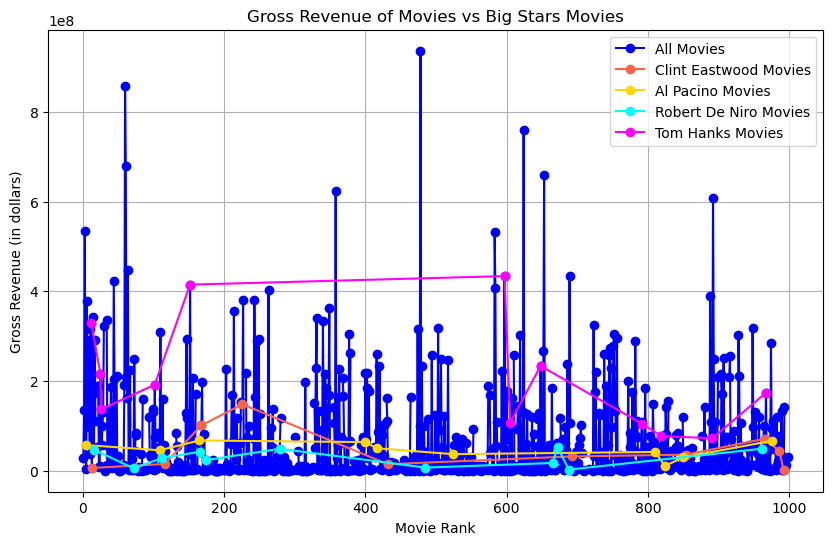

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(movies_df['Rank'], movies_df['Gross'], marker='o', label='All Movies', color='b')
plt.plot(clint_eastwood_movies['Rank'], clint_eastwood_movies['Gross'], marker='o', color='tomato', label='Clint Eastwood Movies')
plt.plot(al_pacino_movies['Rank'], al_pacino_movies['Gross'], marker='o', color='gold', label='Al Pacino Movies')
plt.plot(bobby_de_niro_movies['Rank'], bobby_de_niro_movies['Gross'], marker='o', color='cyan', label='Robert De Niro Movies')
plt.plot(tom_hanks_movies['Rank'], tom_hanks_movies['Gross'], marker='o', color='magenta', label='Tom Hanks Movies')
plt.title('Gross Revenue of Movies vs Big Stars Movies')
plt.xlabel('Movie Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.grid(True)
plt.legend()
plt.show()

It isn't unexpected, but Tom Hanks is far and away the most bankable movie star from this limited test.

Given our dataset, it may also be interesting to see which combinations of talent has lead to all-time great movies, too. Let's look at directors and their most used leads.

In [43]:
movies_df['Star1Director'] = movies_df['Star1']+movies_df['Director']

In [44]:
movies_df['Star1Director'].value_counts().head()

Star1Director
Toshirô MifuneAkira Kurosawa      7
Ethan CoenJoel Coen               6
Charles ChaplinCharles Chaplin    6
Robert De NiroMartin Scorsese     6
Clint EastwoodClint Eastwood      4
Name: count, dtype: int64

Kurosawa's movies regularly starred Toshirô Mifune, and Martin Scorcese often cast De Niro in his movies. We can also see Clint Eastwood and Charlie Chaplin self-directed movies, with Coen brothers movies rounding out our top 5 combinations.

Next, we'll take a look at which stars worked together most frequently on great movies. Let's take a look at which actors played supporting roles in these films most regularly.

In [47]:
movies_df['Star2'].value_counts().head()

Star2
Emma Watson     7
Matt Damon      5
Kate Winslet    4
Ian McKellen    4
Chris Evans     4
Name: count, dtype: int64

In [48]:
movies_df['Star3'].value_counts().head()

Star3
Rupert Grint          5
Scarlett Johansson    4
Jennifer Connelly     4
Rachel McAdams        4
John Goodman          4
Name: count, dtype: int64

In [49]:
movies_df['Star4'].value_counts().head()

Star4
Michael Caine        4
Mark Ruffalo         3
Catherine Keener     3
Julianne Moore       2
Donald Sutherland    2
Name: count, dtype: int64

Stars like Emma Watson, Rupert Grint, Mark Ruffalo and Scarlett Johansson of course together on big franchise movies, like Harry Potter and in the Marvel Cinematic Universe. Let's see which other combinations are most frequent

In [51]:
star_pairs = []
for index, row in movies_df[['Star1', 'Star2', 'Star3', 'Star4']].iterrows():
    pairs = combinations(row, 2)
    star_pairs.extend(pairs)
star_pairs_df = pd.DataFrame(star_pairs, columns=['Star_A', 'Star_B'])
pair_counts = star_pairs_df.value_counts().reset_index(name='Count')
pair_counts.head(10)

,Star_A,Star_B,Count
0,Daniel Radcliffe,Rupert Grint,6
1,Emma Watson,Rupert Grint,5
2,Daniel Radcliffe,Emma Watson,5
3,Robert De Niro,Joe Pesci,4
4,Tom Hanks,Tim Allen,4
5,Robert Downey Jr.,Mark Ruffalo,3
6,Christian Bale,Michael Caine,3
7,Ian McKellen,Orlando Bloom,3
8,Joe Russo,Chris Evans,3
9,Joe Russo,Robert Downey Jr.,3


As expected, the Harry Potter and MCU stars are well represented, but we also see that there have been collaborations in great movies between Robert De Niro and Joe Pesci, Tom Hanks and Tim Allen represent Toy Story, and Ian McKellen, Orlando Bloom, Christian Bale and Michael Caine represent the Lord of the Rings movies and Christopher Nolan Batman movies, respectively. It's worth noting that Daniel Radcliffe and Rupert Grint have one extra count without Emma Watson, as she is not given top billing in the first Harry Potter movie, whereas the two male leads are, alongside Richard Harris and Dame Maggie Smith (RIP).

Now we've taken a look at the big stars, and how they relate to one another and the box office, let's dive deeper into the financials of the most successful movies present in the top 1000.

In [54]:
movies_df[['Series_Title','Gross']].sort_values(by=['Gross'], ascending=False).head(10)

,Series_Title,Gross
477,Star Wars: Episode VII - The Force Awakens,"936,662,225.000"
59,Avengers: Endgame,"858,373,000.000"
623,Avatar,"760,507,625.000"
60,Avengers: Infinity War,"678,815,482.000"
652,Titanic,"659,325,379.000"
357,The Avengers,"623,279,547.000"
891,Incredibles 2,"608,581,744.000"
2,The Dark Knight,"534,858,444.000"
582,Rogue One,"532,177,324.000"
63,The Dark Knight Rises,"448,139,099.000"


It's worth noting that the gross listed here is domestic; many of these movies made over a billion globally; a small search of BoxOfficeMojo shows that Avengers: Endgame made over $600million just in China. Let's see if there is any relation between the money generated by these titans and their rank among the top 1000.

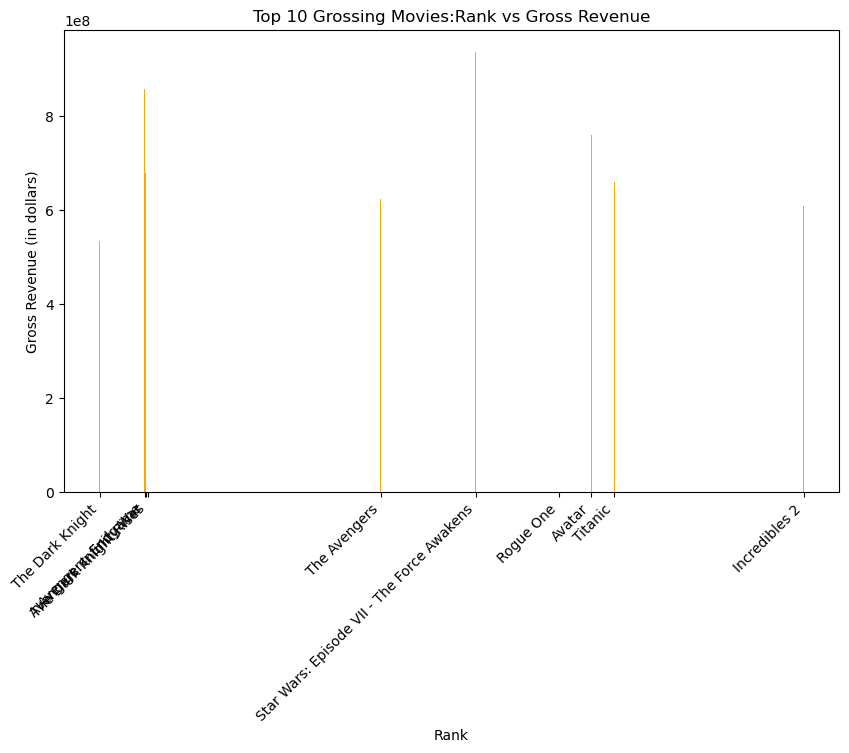

In [56]:
top_10_movies = movies_df[['Series_Title','Gross','Rank']].sort_values(by=['Gross'], ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies['Rank'], top_10_movies['Gross'], color='orange')
plt.xticks(top_10_movies['Rank'], top_10_movies['Series_Title'], rotation=45, ha='right')
plt.title('Top 10 Grossing Movies:Rank vs Gross Revenue')
plt.xlabel('Rank')
plt.ylabel('Gross Revenue (in dollars)')
plt.show()

Unfortunately, The Dark Knight Rises and two Avengers movies are around rank 60, so we can't see the titles well, but it appears as though there is no strong correlation between rank and gross, even among the top performing films. Next, I'd like to look further into correlation between the numerical values we have in our dataframe.

In [58]:
movies_cleaned = movies_df.copy()
movies_cleaned['Runtime'] = movies_cleaned['Runtime'].str.replace(' min', '').astype(float)
movies_cleaned['Released_Year'] = pd.to_numeric(movies_cleaned['Released_Year'], errors='coerce')
numeric_columns = ['Rank','Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
correlation_matrix = movies_cleaned[numeric_columns].corr()
pd.set_option('display.precision', 4)
correlation_matrix

,Rank,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Rank,1.000,0.048,-0.238,-0.942,-0.262,-0.376,-0.068
Released_Year,0.048,1.000,0.166,-0.131,-0.339,0.242,0.233
Runtime,-0.238,0.166,1.000,0.243,-0.031,0.173,0.140
IMDB_Rating,-0.942,-0.131,0.243,1.000,0.269,0.495,0.096
Meta_score,-0.262,-0.339,-0.031,0.269,1.000,-0.019,-0.031
No_of_Votes,-0.376,0.242,0.173,0.495,-0.019,1.000,0.574
Gross,-0.068,0.233,0.140,0.096,-0.031,0.574,1.000


This table can be hard to decipher exactly at first, but offers a lot of insight into the relationships between different data points. For example, we can see that the correlation between Rank and Gross is -0.068, which is very negligable, as we suspected from seeing our graphs earlier. However, the correlation between Rank and IMDB rating is an incredibly strong negative correlation, at -0.942!

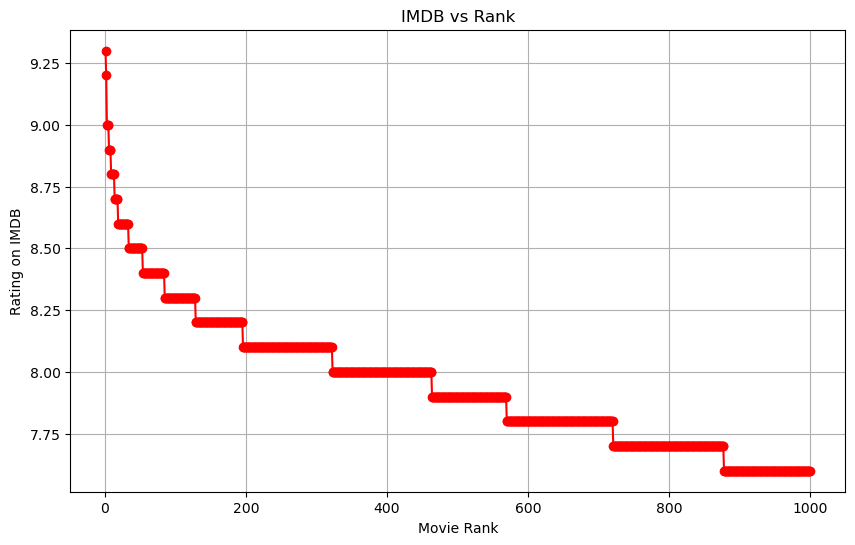

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(movies_cleaned['Rank'], movies_cleaned['IMDB_Rating'], marker='o', color='r')
plt.title('IMDB vs Rank')
plt.xlabel('Movie Rank')
plt.ylabel('Rating on IMDB')
plt.grid(True)
plt.show()

Of course this makes perfect sense, as the IMDB rating, alongside some sort of weighting algorithm based off of the number of votes determines the ranking of the movie. The correlation between rank and release year are negligable, like their gross, but meta score, runtime and number of votes all show some degree of correlation with rank, although a little weak.

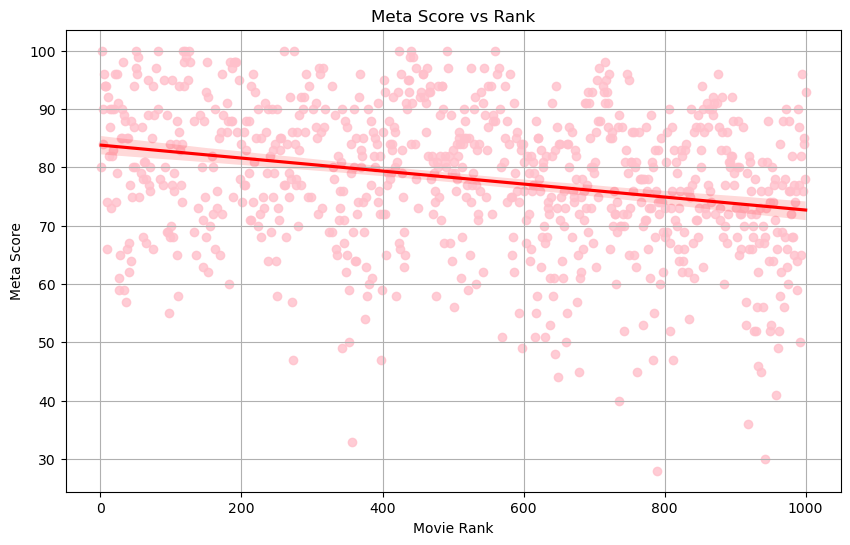

In [62]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['Rank'], y=movies_cleaned['Meta_score'], data=movies_cleaned, marker='o', color='pink', line_kws={"color": "red"})
plt.title('Meta Score vs Rank')
plt.xlabel('Movie Rank')
plt.ylabel('Meta Score')
plt.grid(True)
plt.show()

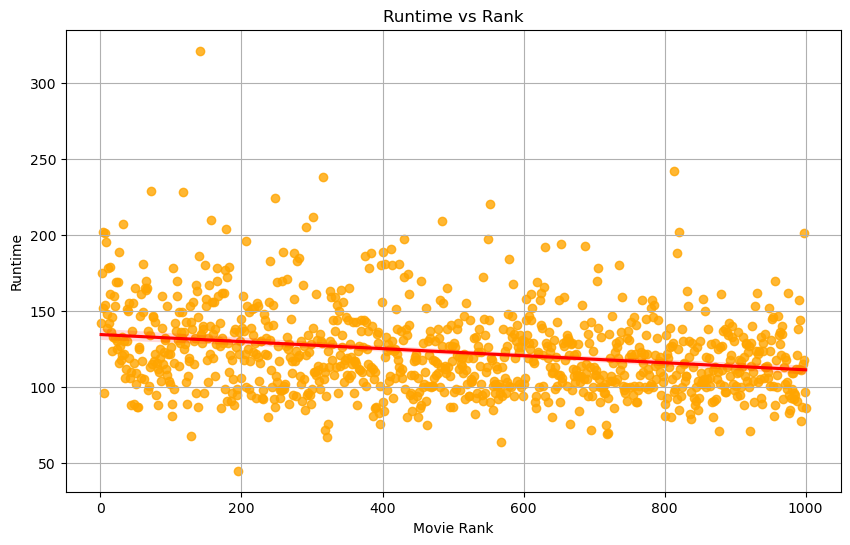

In [63]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['Rank'], y=movies_cleaned['Runtime'], data=movies_cleaned, marker='o', color='orange', line_kws={"color": "red"})
plt.title('Runtime vs Rank')
plt.xlabel('Movie Rank')
plt.ylabel('Runtime')
plt.grid(True)
plt.show()

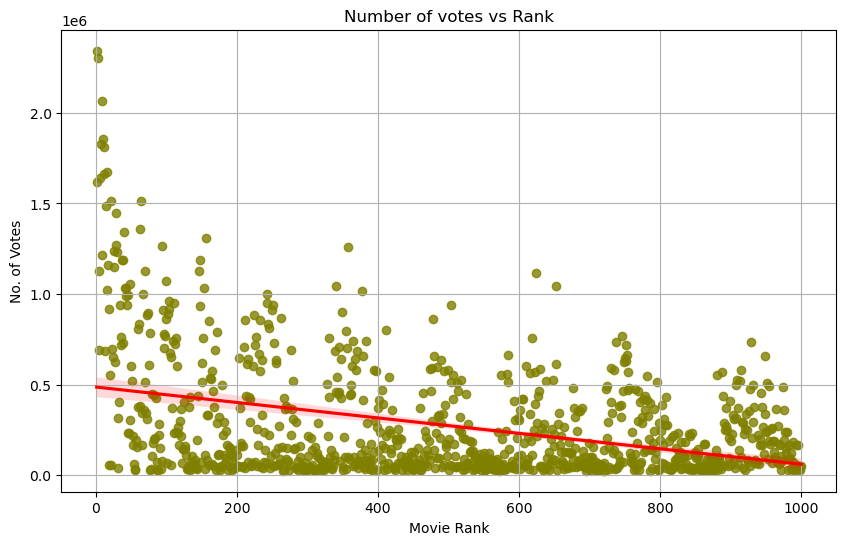

In [64]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['Rank'], y=movies_cleaned['No_of_Votes'], data=movies_cleaned, marker='o', color='olive', line_kws={"color": "red"})
plt.title('Number of votes vs Rank')
plt.xlabel('Movie Rank')
plt.ylabel('No. of Votes')
plt.grid(True)
plt.show()

Although we could see from the correlation table above, it's clearer graphically that the scatterplots are all over the place but do show slightly negative correlations for these three factors. This not only implies, although not strongly, that higher ranked movies have better meta scores and a larger number of votes, but also that longer movies are generally better or more well liked than shorter ones among cinephiles.

Sticking with the number of voters, we can see that there's also a fairly compelling correlation between how many people vote and some other factors, such as IMDB Rating and Gross.

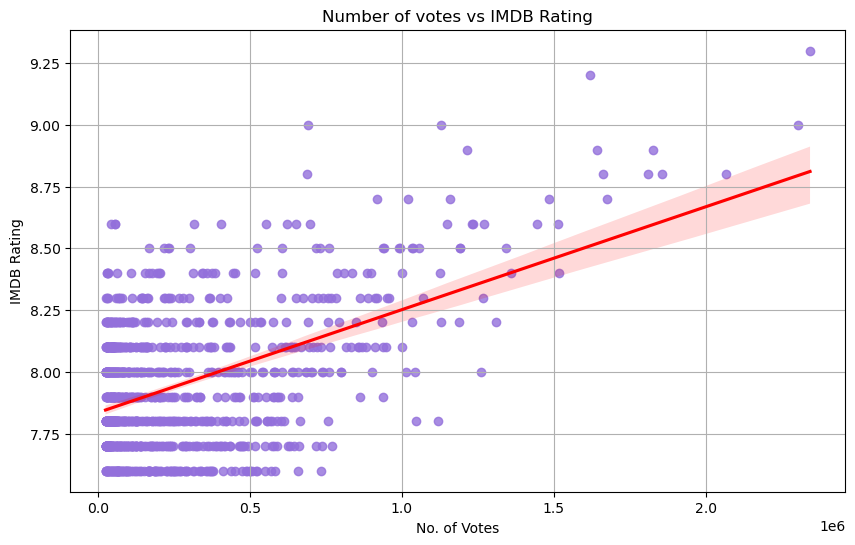

In [66]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['No_of_Votes'], y=movies_cleaned['IMDB_Rating'], data=movies_cleaned, marker='o', color='mediumpurple', line_kws={"color": "red"})
plt.title('Number of votes vs IMDB Rating')
plt.xlabel('No. of Votes')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.show()

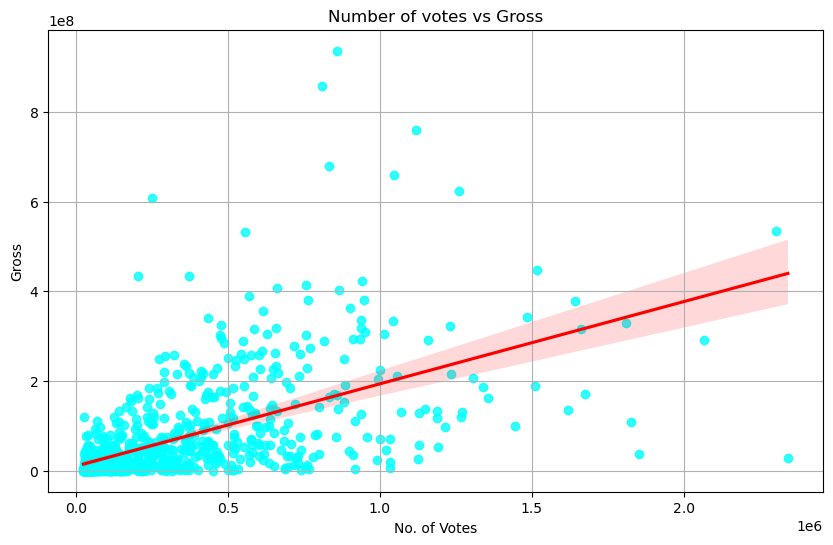

In [67]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['No_of_Votes'], y=movies_cleaned['Gross'], data=movies_cleaned, marker='o', color='Cyan', line_kws={"color": "red"})
plt.title('Number of votes vs Gross')
plt.xlabel('No. of Votes')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

Whilst these correlations aren't overwhelmingly strong, they do allow us to draw some conclusions. People are more likely to cast votes on movies that they like more or feel more strongly about, and movies that sell more tickets at the box office also have more votes cast for them; which makes perfect sense as there is a larger pool of people from which to cast.

Let's also take a look at how the movies within the top 1000 vary over time since release.

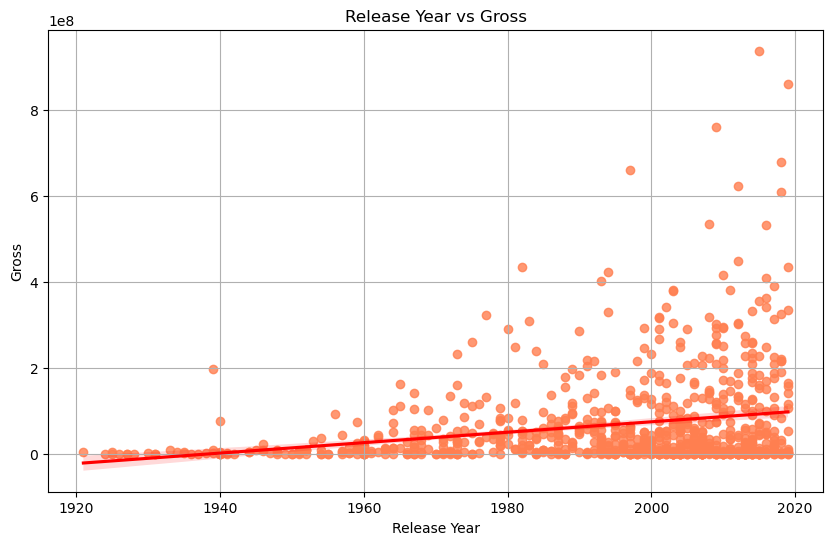

In [69]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['Released_Year'], y=movies_cleaned['Gross'], data=movies_cleaned, marker='o', color='Coral', line_kws={"color": "red"})
plt.title('Release Year vs Gross')
plt.xlabel('Release Year')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

Here we can see that, as expected, there is slight correlation between release year and gross; presumably as more people can go and watch movies at the theater than in the past. I suppose in a few years time we can see how the rise of streaming services affects this data.

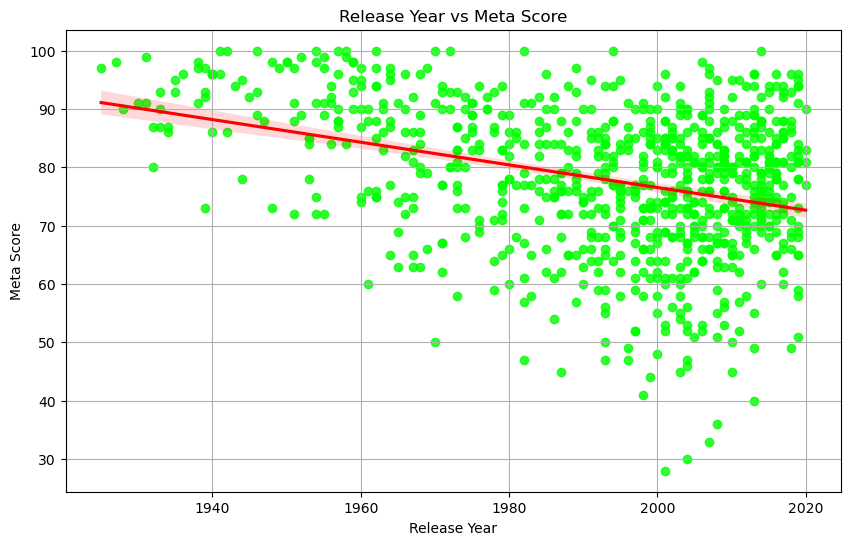

In [71]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['Released_Year'], y=movies_cleaned['Meta_score'], data=movies_cleaned, marker='o', color='Lime', line_kws={"color": "red"})
plt.title('Release Year vs Meta Score')
plt.xlabel('Release Year')
plt.ylabel('Meta Score')
plt.grid(True)
plt.show()

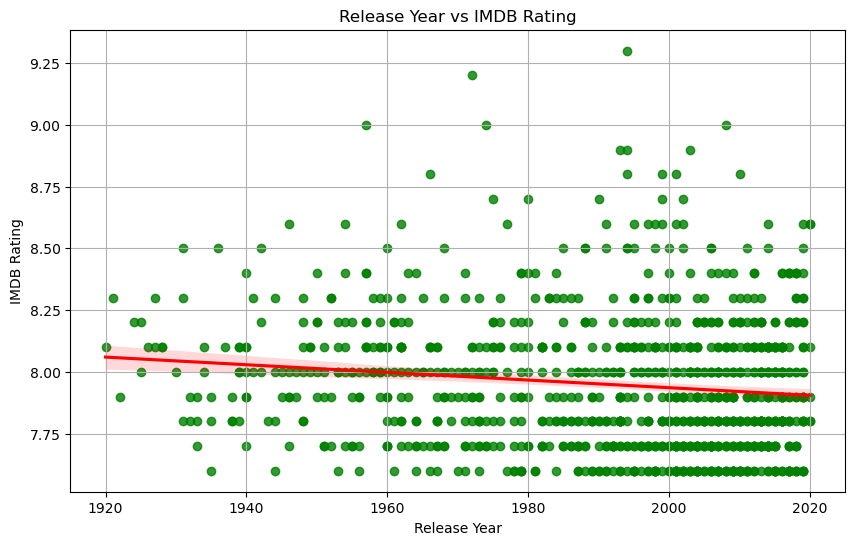

In [72]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['Released_Year'], y=movies_cleaned['IMDB_Rating'], data=movies_cleaned, marker='o', color='Green', line_kws={"color": "red"})
plt.title('Release Year vs IMDB Rating')
plt.xlabel('Release Year')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.show()

Conversely, we can see that the Meta score and IMDB rating of the movies in the top 1000 are both showing slgiht negative correlation with release year, i.e. older movies are generally ever so slightly higher quality.

Finally, I'd like to take a look at how the movies' runtime relates to the other points within our data frame.

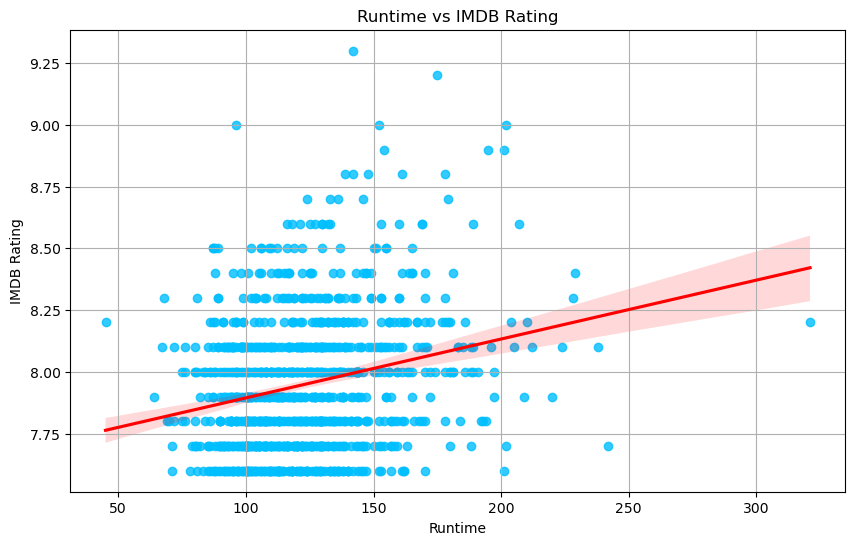

In [74]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['Runtime'], y=movies_cleaned['IMDB_Rating'], data=movies_cleaned, marker='o', color='deepskyblue', line_kws={"color": "red"})
plt.title('Runtime vs IMDB Rating')
plt.xlabel('Runtime')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.show()

First up is Runtime vs. IMDB Rating, and we can see that there is indeed a positive correlation between the two. We'd expect this, given the correlation between runtime and rank we observed earlier.

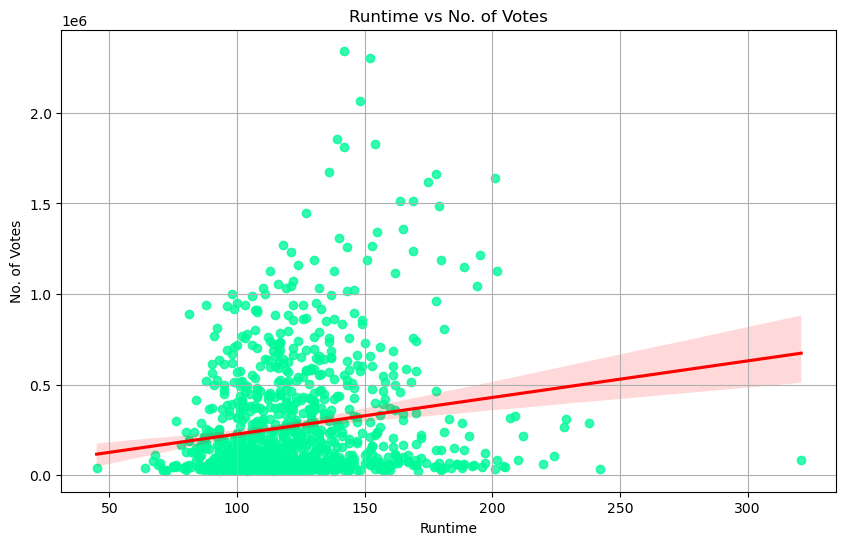

In [76]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['Runtime'], y=movies_cleaned['No_of_Votes'], data=movies_cleaned, marker='o', color='mediumspringgreen', line_kws={"color": "red"})
plt.title('Runtime vs No. of Votes')
plt.xlabel('Runtime')
plt.ylabel('No. of Votes')
plt.grid(True)
plt.show()

Next, we can see that the number of votes increases with runtime, as there is a weak correlation between the two. This is interesting, as it seems fairly common place for people to complain about movies being too long, although I suppose we can infer that the engaged audience who leave IMDB ratings are perhaps less turned away by a longer runtime.

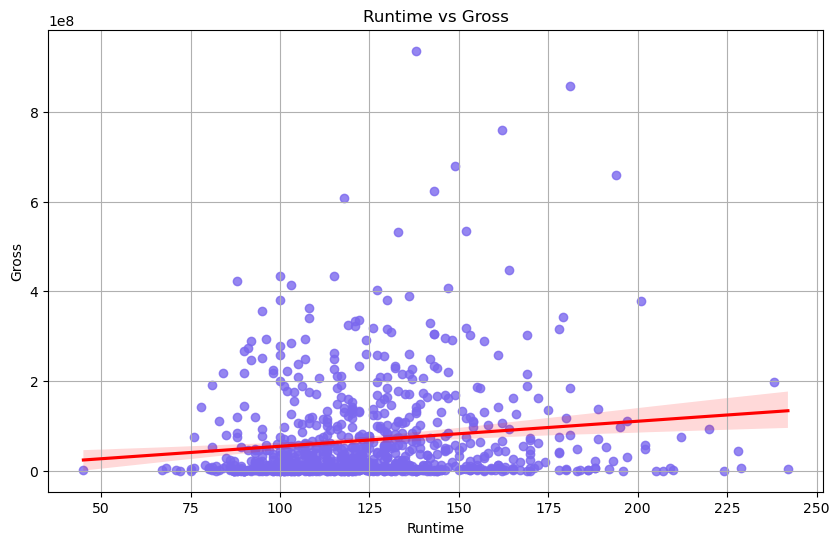

In [78]:
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_cleaned['Runtime'], y=movies_cleaned['Gross'], data=movies_cleaned, marker='o', color='mediumslateblue', line_kws={"color": "red"})
plt.title('Runtime vs Gross')
plt.xlabel('Runtime')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

Last but not least, we can see that there is another weak correlation between runtime and gross. Once again it is an interesting correlation to observe, as it would imply that the movie going audience prefer to buy tickets to see longer films. Making a longer film does of course increase its budget, so this is something that the movie studios will have to balance effectively.

Thank you for reading this exploration of the IMDB top 1000 movies. The dataframe, while easy to work with, is a little limited in scope; it would be interesting to revisit this idea with additional data to see how different genres of movies perform, or how male and female directors differ in terms of box office performance and IMDB rating.